In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from random import sample  

In [2]:
train = pd.read_csv('Yes_Bank_Training.csv')

In [16]:
len(train.columns)

17

In [8]:
train.drop('serial_number',axis=1,inplace=True)

In [9]:
train.apply(lambda x:sum(x.isnull()),axis=0)

age_in_years            0
job_description         0
marital_status          0
education_details       0
has_default             0
balance_in_account      0
housing_status          0
previous_loan           0
phone_type              0
date                    0
month_of_year           0
call_duration           0
campaign_contacts       0
days_passed             0
previous_contact        0
poutcome_of_campaign    0
outcome                 0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31649 entries, 0 to 31648
Data columns (total 17 columns):
age_in_years            31649 non-null int64
job_description         31649 non-null object
marital_status          31649 non-null object
education_details       31649 non-null object
has_default             31649 non-null object
balance_in_account      31649 non-null int64
housing_status          31649 non-null object
previous_loan           31649 non-null object
phone_type              31649 non-null object
date                    31649 non-null int64
month_of_year           31649 non-null object
call_duration           31649 non-null int64
campaign_contacts       31649 non-null int64
days_passed             31649 non-null int64
previous_contact        31649 non-null int64
poutcome_of_campaign    31649 non-null object
outcome                 31649 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


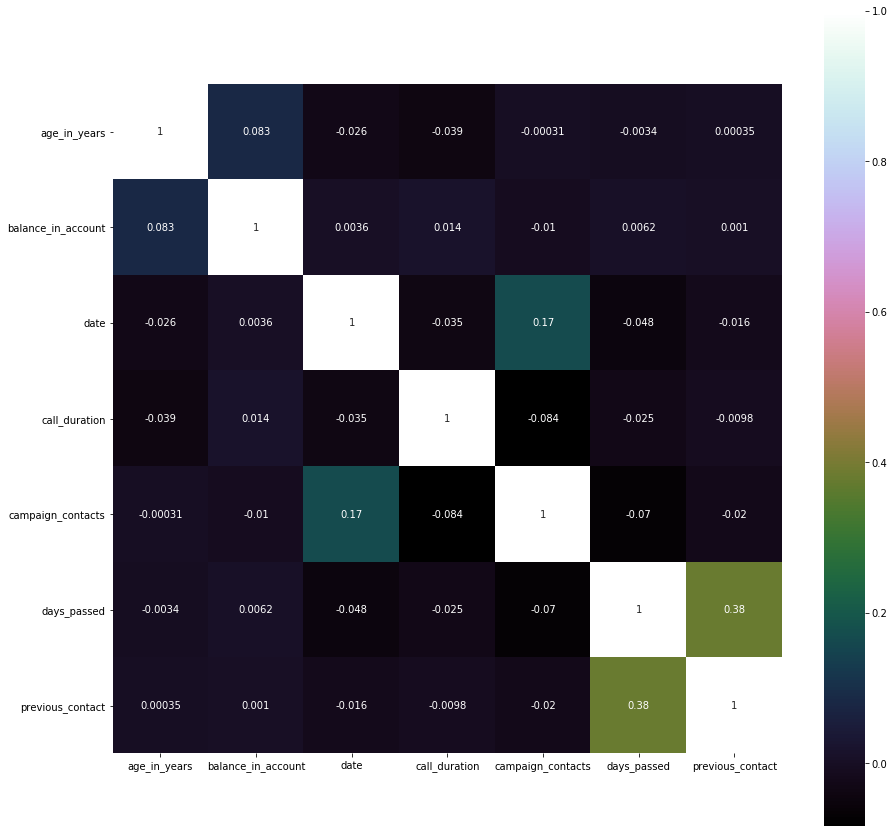

In [11]:
correlation = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

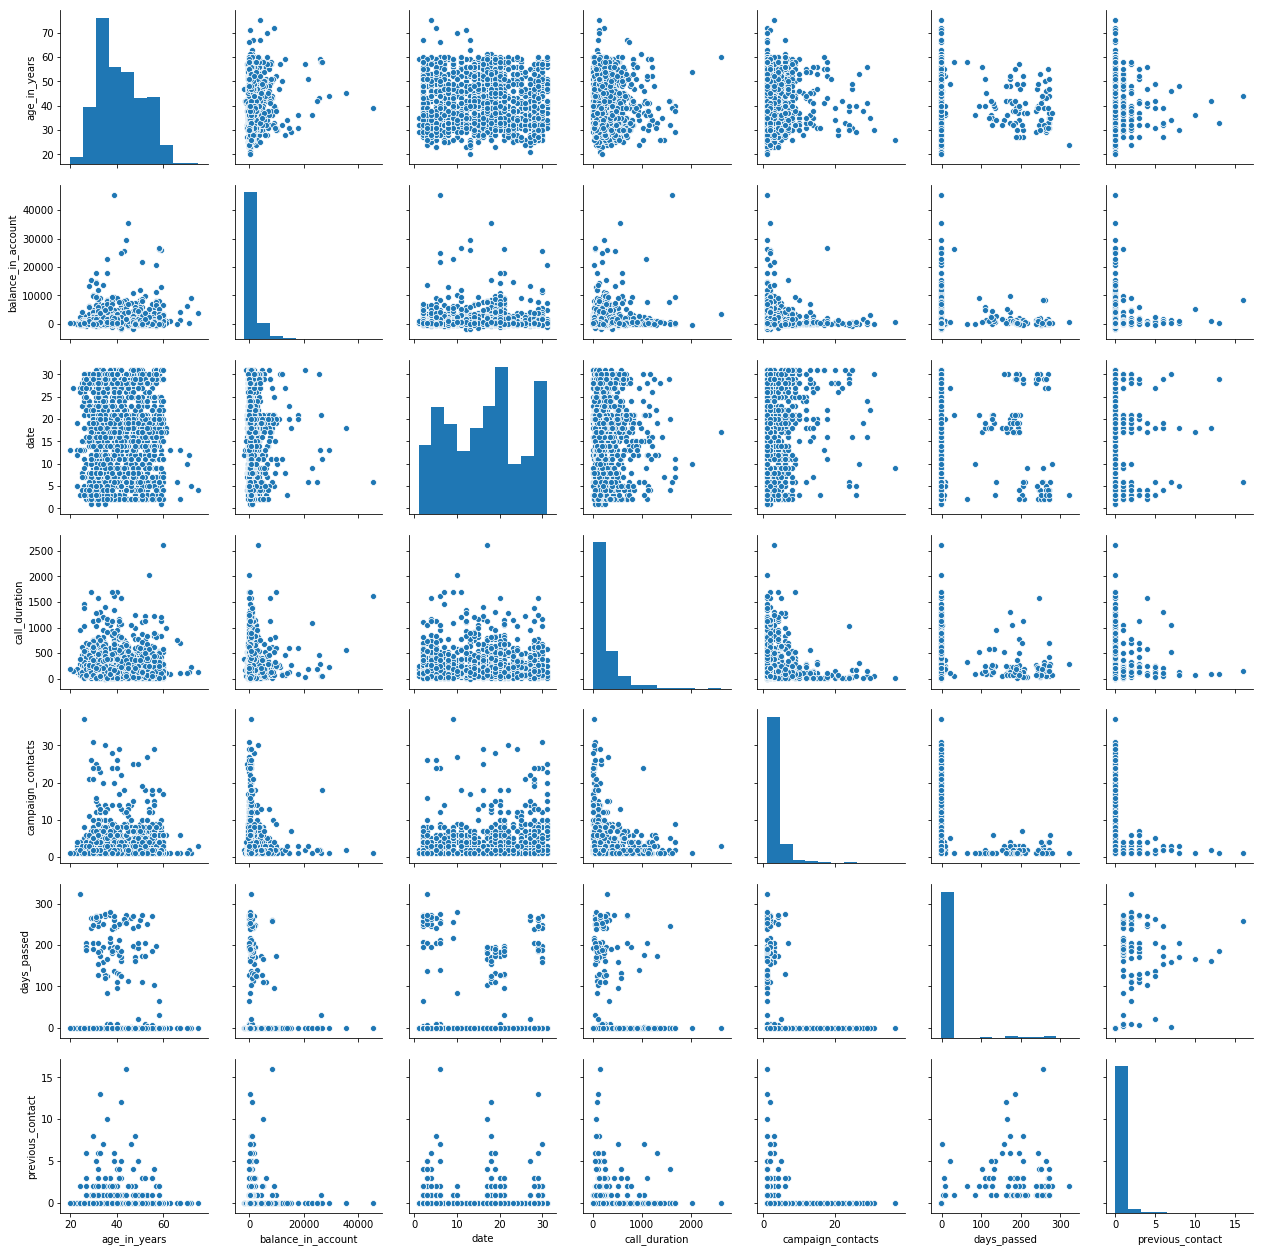

In [12]:
# take a 5% sample as this is computationally expensive
df_sample = train.sample(frac=0.05)  
# Pairwise plots
pplot = sns.pairplot(df_sample)  

In [13]:
obj_df = train.select_dtypes(include=['object']).copy()

In [19]:
obj_df.columns

Index(['job_description', 'marital_status', 'education_details', 'has_default',
       'housing_status', 'previous_loan', 'phone_type', 'month_of_year',
       'poutcome_of_campaign', 'outcome'],
      dtype='object')

In [27]:
obj_df['poutcome_of_campaign'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.columns.values:
           if train[col].dtypes=='object':
            data=train[col]
            le.fit(data.values)
            train[col]=le.transform(train[col])
                       

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31649 entries, 0 to 31648
Data columns (total 17 columns):
age_in_years            31649 non-null int64
job_description         31649 non-null int32
marital_status          31649 non-null int32
education_details       31649 non-null int32
has_default             31649 non-null int32
balance_in_account      31649 non-null int64
housing_status          31649 non-null int32
previous_loan           31649 non-null int32
phone_type              31649 non-null int32
date                    31649 non-null int64
month_of_year           31649 non-null int32
call_duration           31649 non-null int64
campaign_contacts       31649 non-null int64
days_passed             31649 non-null int64
previous_contact        31649 non-null int64
poutcome_of_campaign    31649 non-null int32
outcome                 31649 non-null int32
dtypes: int32(10), int64(7)
memory usage: 2.9 MB
